# Find longest continuous dataset

In [179]:
import pandas as pd

data = pd.read_excel('./data/Global_CALM_MEERA2_data.xlsx',sheet_name = 'unbalanced_all_CALM_sites')
data['Year'] = pd.to_datetime(data.Yr, format='%Y')
data['Yearstr']=data['Year'].apply(lambda x : x.strftime('%Y'))
print(data.head())
# print(data.Yr.min())
# print(data.Yr.max())
# print(data.shape)
# print(len(data['Site'].unique()))
# print(sum(data.Yr == 2009) )
# print(sum(data.Yr == 2007) )

   Region          PF Site    Yr Active_Layer_cm  sqrt_Thaw_Degree_Days  \
0  Alaska  Continuous   U1  1993              30              12.853198   
1  Alaska  Continuous   U1  1994              35               6.447333   
2  Alaska  Continuous   U1  1995              35              10.237655   
3  Alaska  Continuous   U1  1996              36               9.401592   
4  Alaska  Continuous   U1  1997              37              14.398287   

   Max_Snow_Depth_mm  Total_Precipitation_mm       Year Yearstr  
0         641.058266              395.930561 1993-01-01    1993  
1         692.663610              385.036307 1994-01-01    1994  
2         707.337201              324.643505 1995-01-01    1995  
3         460.663170              298.618198 1996-01-01    1996  
4         530.601203              357.271073 1997-01-01    1997  


In [166]:
# find current # of balanced sites
balanced = pd.read_excel('./data/Global_CALM_MEERA2_data.xlsx',sheet_name = 'Balanced_CALM_subset')
len(balanced.Site.unique())

18

In [167]:
counts = data.groupby(['Site']).size()
# counts.reset_index(inplace=True)
counts= pd.DataFrame({'counts':counts})
counts.sort_values(by='counts', inplace=True)



<AxesSubplot:xlabel='Site'>

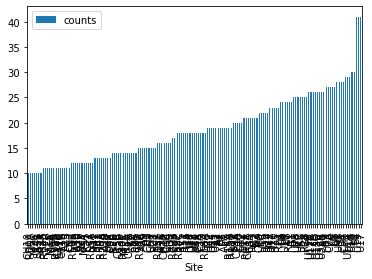

In [168]:
counts.plot.bar( rot=90)

<AxesSubplot:xlabel='Site'>

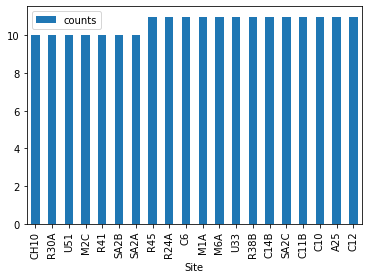

In [169]:
counts[0:20].plot.bar( rot=90)

In [180]:

# Define filter dates
start_date = '01.01.2008'
end_date = '01.01.2018'

# Create a list in minute resolution between start and end date
diff = pd.date_range(start_date,end_date,freq='YS')
diff

DatetimeIndex(['2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [181]:
# Keep only sites with all years in diff range
filtered = data.groupby('Site').filter(lambda x: all([year in x['Yearstr'].tolist() for year in diff.strftime('%Y').tolist()]))
print(filtered.head())
len(filtered['Site'].unique())

   Region          PF Site    Yr Active_Layer_cm  sqrt_Thaw_Degree_Days  \
0  Alaska  Continuous   U1  1993              30              12.853198   
1  Alaska  Continuous   U1  1994              35               6.447333   
2  Alaska  Continuous   U1  1995              35              10.237655   
3  Alaska  Continuous   U1  1996              36               9.401592   
4  Alaska  Continuous   U1  1997              37              14.398287   

   Max_Snow_Depth_mm  Total_Precipitation_mm       Year Yearstr  
0         641.058266              395.930561 1993-01-01    1993  
1         692.663610              385.036307 1994-01-01    1994  
2         707.337201              324.643505 1995-01-01    1995  
3         460.663170              298.618198 1996-01-01    1996  
4         530.601203              357.271073 1997-01-01    1997  


73

In [182]:
data.head()

,Region,PF,Site,Yr,Active_Layer_cm,sqrt_Thaw_Degree_Days,Max_Snow_Depth_mm,Total_Precipitation_mm,Year,Yearstr
0,Alaska,Continuous,U1,1993,30,12.853198,641.058266,395.930561,1993-01-01,1993
1,Alaska,Continuous,U1,1994,35,6.447333,692.663610,385.036307,1994-01-01,1994
2,Alaska,Continuous,U1,1995,35,10.237655,707.337201,324.643505,1995-01-01,1995
3,Alaska,Continuous,U1,1996,36,9.401592,460.663170,298.618198,1996-01-01,1996
4,Alaska,Continuous,U1,1997,37,14.398287,530.601203,357.271073,1997-01-01,1997


In [183]:
# Groups still have earlier observations, need to filter
# list length of each group 
filtered.groupby('Site').size().head()

Site
A16    15
C18    20
C5A    28
C7A    27
CH1    29
       ..
U7B    25
U7C    25
U8     24
U9A    20
U9B    28
Length: 73, dtype: int64

In [189]:

keepers = filtered[filtered['Yearstr'].isin(diff.strftime('%Y').tolist())]
keepers.head()

,Region,PF,Site,Yr,Active_Layer_cm,sqrt_Thaw_Degree_Days,Max_Snow_Depth_mm,Total_Precipitation_mm,Year,Yearstr
15,Alaska,Continuous,U1,2008,34,11.654343,514.459848,297.430212,2008-01-01,2008
16,Alaska,Continuous,U1,2009,34,15.907646,618.878663,314.779541,2009-01-01,2009
17,Alaska,Continuous,U1,2010,41,15.624951,544.629514,306.066766,2010-01-01,2010
18,Alaska,Continuous,U1,2011,41,18.680877,552.610755,297.296169,2011-01-01,2011
19,Alaska,Continuous,U1,2012,38,15.217272,570.404708,298.076770,2012-01-01,2012


In [204]:
# check if there are 11 for all sites
all(keepers.groupby('Site').size()==11)
len((keepers.groupby('Site').size()).unique()) ==1
(keepers.groupby('Site').size()).unique()[0]
len(keepers['Site'].unique())

73

In [195]:
keepers.to_csv('./filtered_balanced_2008_2018_n11_N73.csv')

In [251]:
# quickly write out possible balanced samples

# Define filter dates
end_date = 2020

for start_date in range(2003,2008+1):
# start_date = 2004

    # Create a list in minute resolution between start and end date
    diff = [str(x) for x in range(start_date,end_date+1)]

    filtered = data.groupby('Site').filter(lambda x: all([year in x['Yearstr'].tolist() for year in diff]))
    keepers = filtered[filtered['Yearstr'].isin(diff)]

    # drop G1 and R36 (no snow measures)
    keepers = keepers[~(keepers.Site.isin(['G1','G2','R36']))]

    # if all groups are same length
    if len((keepers.groupby('Site').size()).unique()) == 1:
        print('printed')
        keepers.drop(columns=['Yearstr','Year']).to_csv('./data/possible_balanced_data/filtered_balanced_'+str(start_date)+'_'+str(end_date)+'_n'+
            str((keepers.groupby('Site').size()).unique()[0])+
            '_N'+str(len(keepers['Site'].unique()))+'.csv')

printed
printed
printed
printed
printed
printed


In [252]:
2511/15

167.4